In [4]:
# Importing standard Qiskit libraries

# Some modules may have been deprecated, check the latest uploading of Qiskit
from qiskit import QuantumCircuit, transpile, Aer, execute, IBMQ
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization.circuit import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import Statevector
import numpy
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator

IBMQ.save_account("Your ibm token", overwrite=True) #Enter your token
IBMQ.load_account()
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

pi=numpy.pi

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()



In [2]:
# Creation of the quantum register and the classical register
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')

circ = QuantumCircuit(q,c)

In [ ]:
# Vector initialization
b=[1/numpy.sqrt(5),2/numpy.sqrt(5)]
circ.initialize(b,3)

In [ ]:
# Construction of the algorithm
# Start Phase estimation (part (a) fig. 3.3)
circ.h(q[3])
circ.cx(q[3],q[2])
circ.cx(q[2],q[1])
circ.h(q[3])
circ.x(q[2])
circ.swap(q[1],q[2]) # End Phase estimation
circ.barrier(q)
circ.swap(q[1],q[2]) # Reciprocal of eigenvalues
# Controlled rotations (part (b) fig. 3.3)
circ.cry(pi,q[1],q[0])
circ.cry(pi/3,q[2],q[0])
# Start uncomputation (parte (c) fig. 3.3)
circ.swap(q[1],q[2]) # Reciprocal of reciprocal of eigenvalues
circ.barrier(q)
# Start Inverse Phase estimation
circ.swap(q[1],q[2])
circ.x(q[2])
circ.cx(q[2],q[1])
circ.h(q[3])
circ.cx(q[3],q[2])
circ.h(q[3])
circ.barrier(q)
#circ.h(q[1])
#circ.h(q[2])

In [5]:
# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**4)

# Evolve the state by the quantum circuit (ideal result)
state = state.evolve(circ)

# Draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
# Measurement of the quantum register on the classical register
circ.measure(q,c)

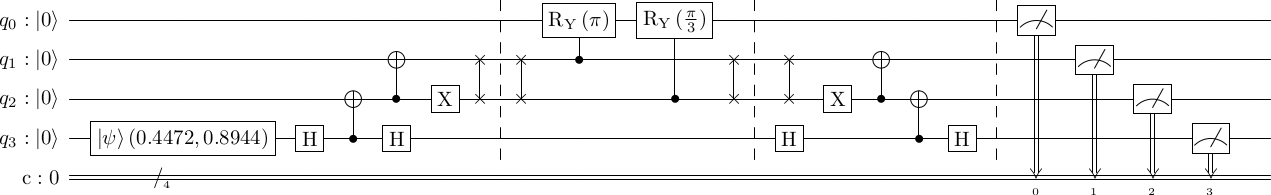

In [8]:
# Draw the circuit with barriers
circuit_drawer(circ, output='latex',initial_state=True, plot_barriers=True)

In [ ]:
transpile(circ)

In [10]:
# Call to the Qasm simulator and simulation
simulator = Aer.get_backend('qasm_simulator')
result=execute(circ,simulator,shots=10000).result()
counts=result.get_counts(circ)

You can find all the plots in my thesis

In [ ]:
# Draw results
#plot_histogram(counts,title='HHL results counts')
plot_distribution(counts,title='HHL qasm results counts')

In [ ]:
# Run the program on a real quantum computer
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibm_perth')
job = execute(circ,backend = device,shots = 10000)
print(job.job_id())
job_monitor(job)
device_result = job.result()
plot_distribution(device_result.get_counts(circ),title='HHL results on a real qc')

In [2]:
# Draw results
plot_distribution(device_result.get_counts(circ),title='HHL results on a real qc')